In [1]:
#libraries.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures as poly

In [25]:
# adding the dataset and projecting it's head.
data=pd.read_csv("kc_house_data.csv")
data.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [8]:
# checking for "NAN" in the dataset 
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [55]:
# in this paragraph we'll name the most important features in the dataset.
# number of bedrooms, bathrooms and view.

In [32]:
# spliting the dataset into training and testing set.
x=data[["grade","bedrooms","bathrooms","view"]]
y=data[["price"]].values
x_train, x_test ,y_train, y_test =train_test_split(x,y, test_size=0.35,random_state=40)
x_train, x_test ,y_train, y_test

(       grade  bedrooms  bathrooms  view
 10009      6         3       1.00     0
 1163       8         6       4.50     0
 18587      7         3       1.50     0
 20344      9         5       3.50     0
 10981     11         4       3.25     0
 ...      ...       ...        ...   ...
 11532      9         5       2.75     0
 16065      8         4       3.00     0
 14501      5         3       1.00     0
 14555      7         3       1.75     0
 11590      6         3       1.00     0
 
 [14048 rows x 4 columns],
        grade  bedrooms  bathrooms  view
 21568     10         4       3.50     0
 3040       9         4       2.50     0
 198        7         3       2.50     0
 16456      8         3       2.00     0
 19502      8         5       3.00     0
 ...      ...       ...        ...   ...
 7505       7         3       1.75     0
 12852      7         4       2.75     0
 7046      11         4       3.50     0
 9738       7         5       1.00     0
 13963      6         2     

In [62]:
# Applying Linear regression to the training set. 
# and Measuring the performance of linear regression using the testing set
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))

MSE: 77641091682.00917
R squared: 0.3805876830149365


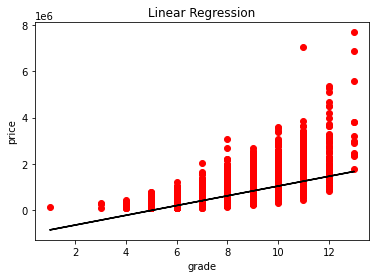

In [26]:
# plotting the linear regression
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [42]:
# Applying multi-linear regression 
x=data[["grade"]]
x2=data[["sqft_living"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))

MSE: 68216329489.98442
R squared: 0.45738411228260767


In [30]:
# comparing multi-linear regression to the linear model:

# the mean squared errors are completely different 
# "MSE: 77641091682.00917" in the linear model 
# "MSE: 68216329489.98442" in the multi-linear model

# the "R squared" is also different
# "R squared: 0.3805876830149365" in the linear model
# "R squared: 0.45738411228260767" in the multi-linear model

In [41]:
# Applying Polynomial regression and comparing it to linear and multilinear regression
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  49456186665.75157
R squared:  0.606608669340764


In [ ]:
# the comparison :

# like before, the "MSE" and the "R squared" are all different 
# "MSE: 77641091682.00917" in the linear model 
# "MSE: 68216329489.98442" in the multi-linear model
# "MSE: 49456186665.75157" in the Polynomial model

# "R squared: 0.3805876830149365" in the linear model
# "R squared: 0.45738411228260767" in the multi-linear model
# "R squared:  0.606608669340764" in the Polynomial model